In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
cd ..

C:\Users\penthotal\Desktop


In [77]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedShuffleSplit

from modules.neural_networks import BayesianMLP

import pymc3 as pm

from modules.viz_utils import visualize_embedding, visualize_kde_embedding

In [23]:
X, y = load_digits(return_X_y=True)

for tr_i, ts_i in StratifiedShuffleSplit(n_splits=1).split(X, y):
    
    X_tr, X_ts = X[tr_i], X[ts_i]
    y_tr, y_ts = y[tr_i], y[ts_i]

    scaler = MinMaxScaler()
    scaler.fit(X_tr)

    X_tr = scaler.transform(X_tr)
    X_ts = scaler.transform(X_ts)

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


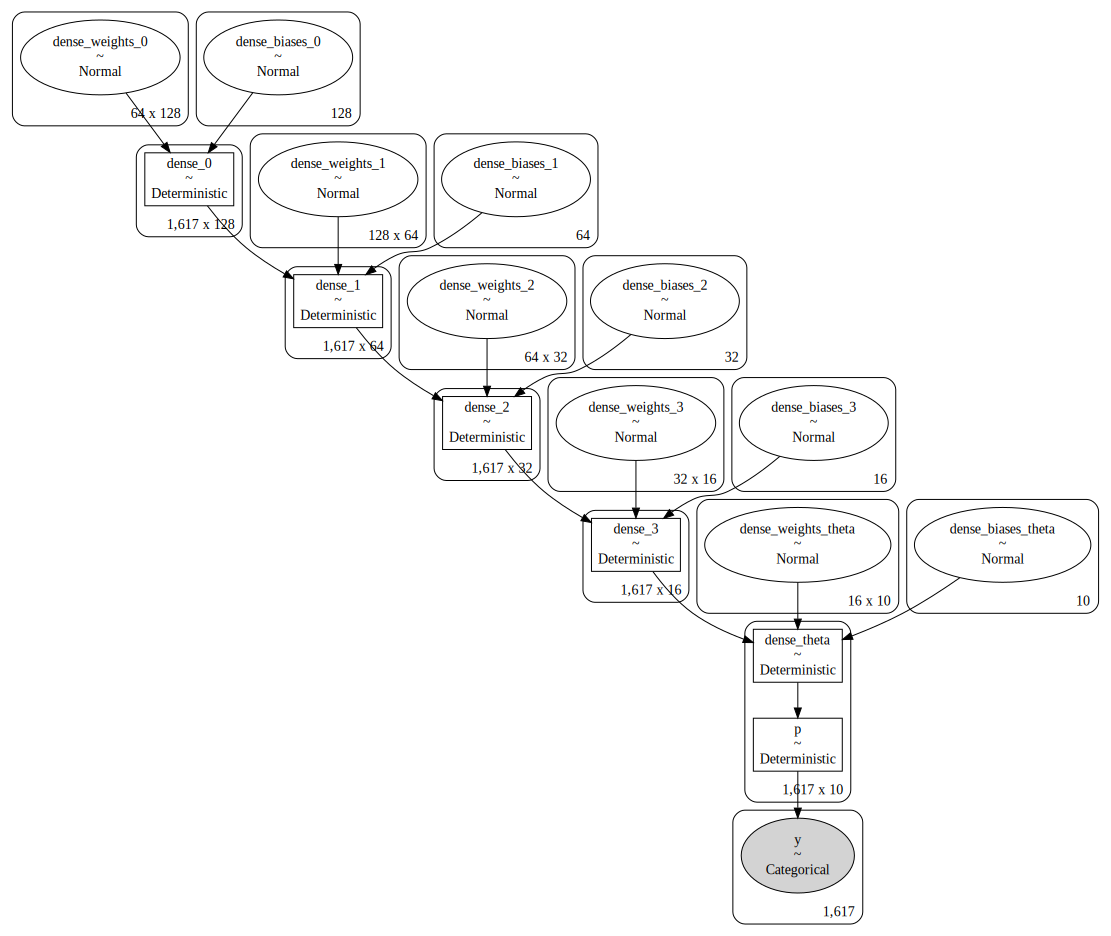

In [24]:
categorical_perceptron = BayesianMLP(
    X=X_tr, 
    y=y_tr, 
    shape_out=10, 
    likelyhood_model='categorical_lk',
    layers=(128, 64, 32, 16), 
    activation='tanh',
    prior=pm.Normal,
    mu=0,
    sigma=0.1,
    batch_size=150
)
categorical_perceptron.show_graph()

In [25]:
categorical_perceptron.fit(n=40000)
categorical_traces = categorical_perceptron.predict(
    X_ts, 
    y_ts,
    ['dense_0', 'dense_1', 'dense_2', 'dense_3'],
    samples=3000
)

Finished [100%]: Average Loss = 352.05
INFO:pymc3.variational.inference:Finished [100%]: Average Loss = 352.05


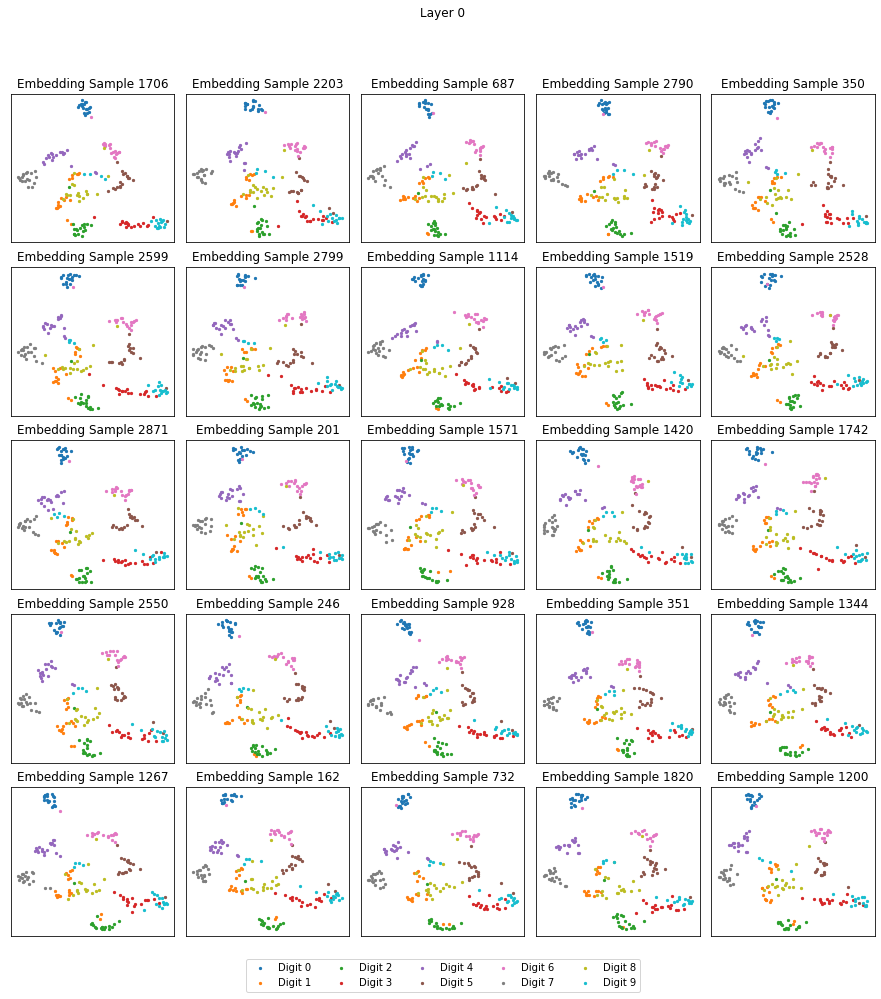

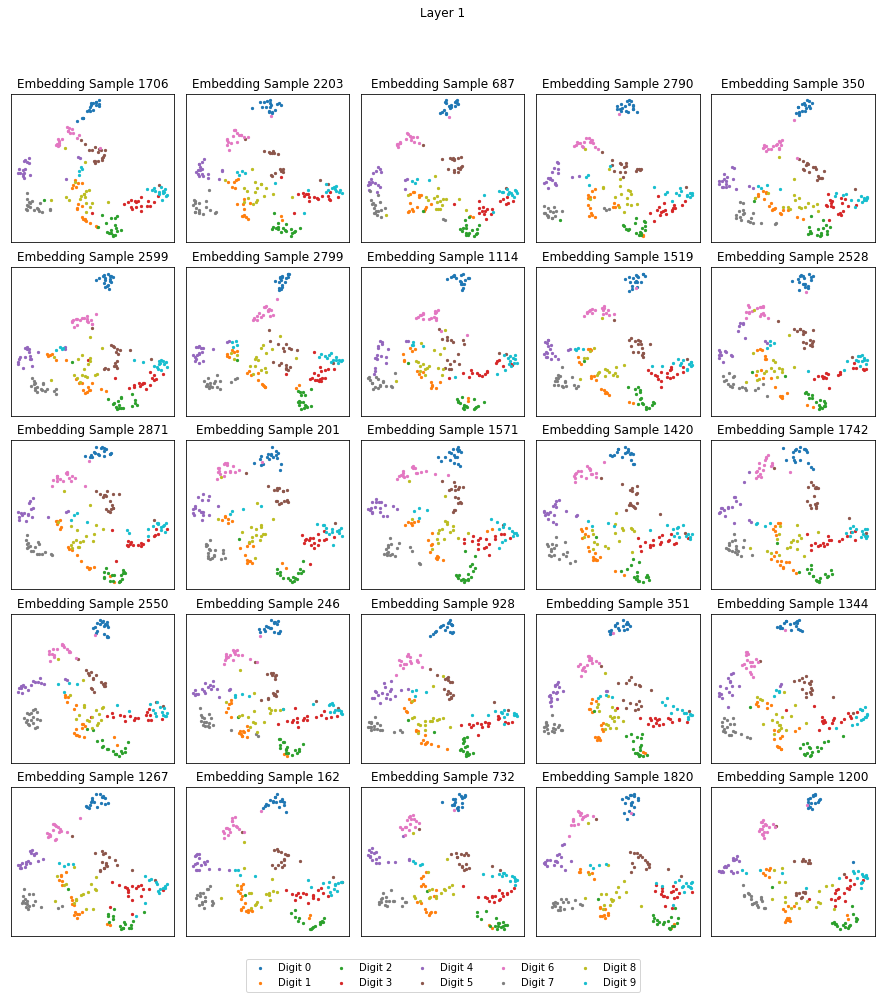

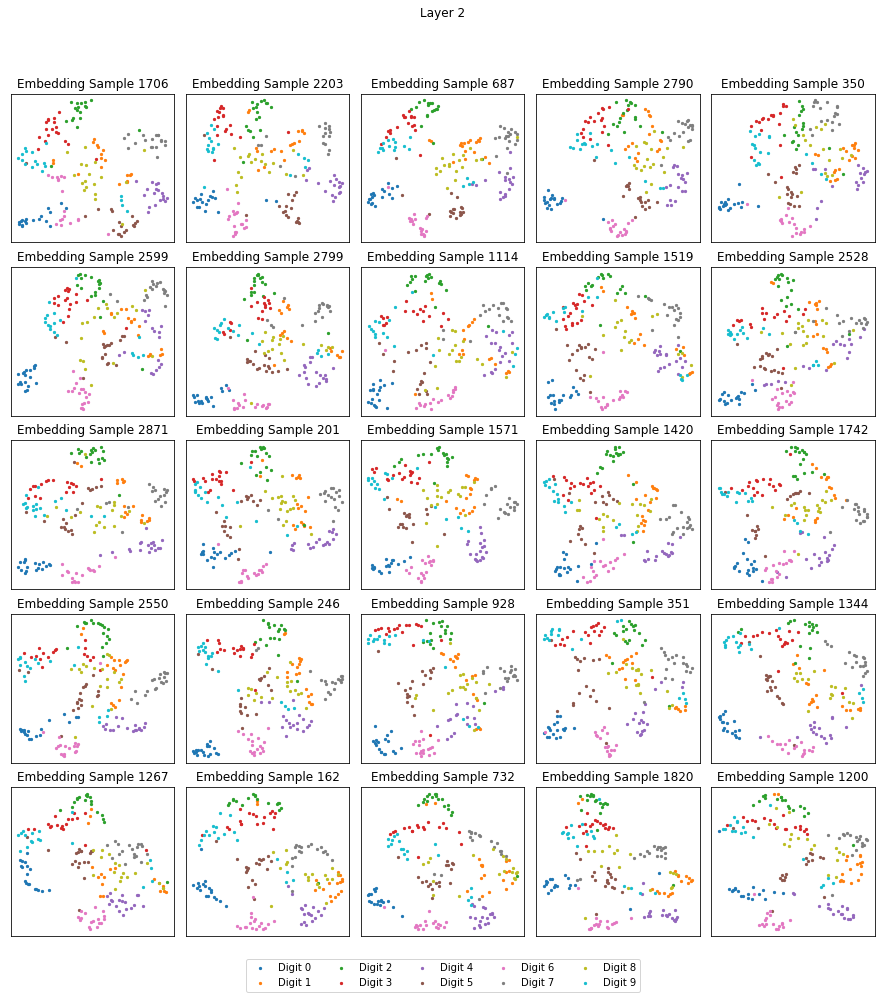

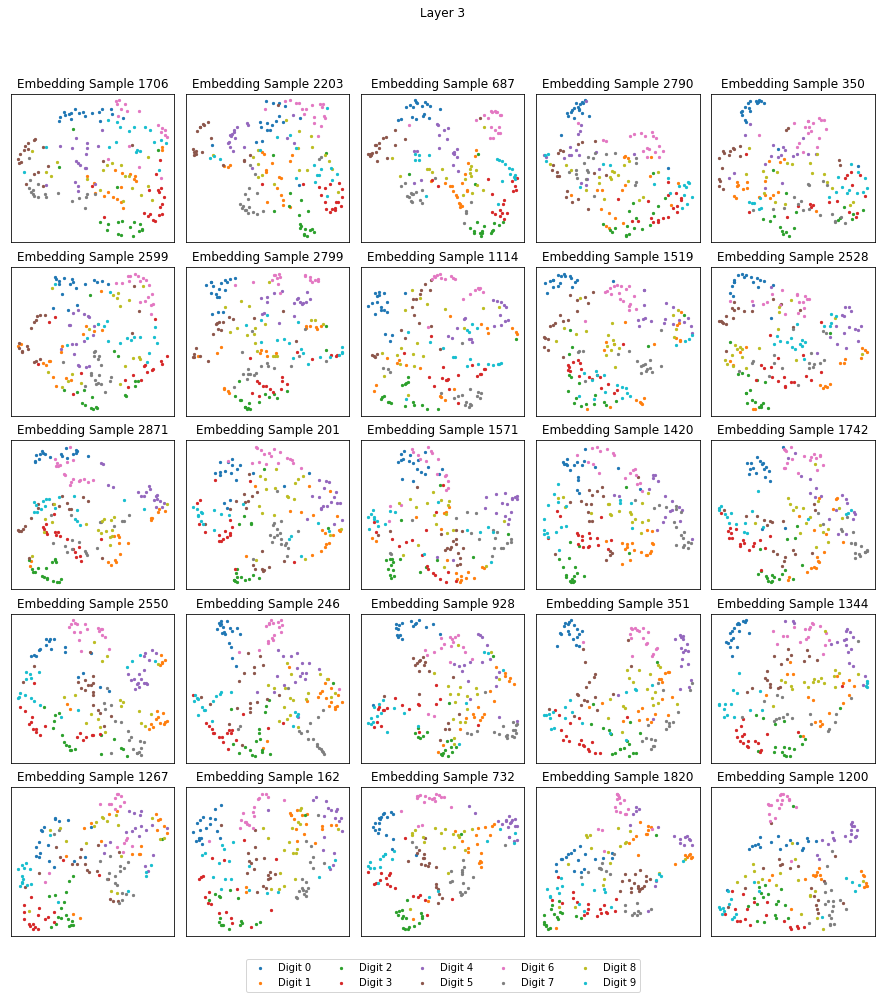

In [52]:
sampled_emb = np.random.choice(
    [sample for sample in range(3000)],
    25
)
for layer in range(4):
    
    visualize_embedding(
        embedding=categorical_traces[f'dense_{layer}'],
        y=y_ts,
        metric='cosine',
        n_epochs=2000,
        random_state=666,
        sampled_emb=sampled_emb,
        title=f'Layer {layer}'
    )

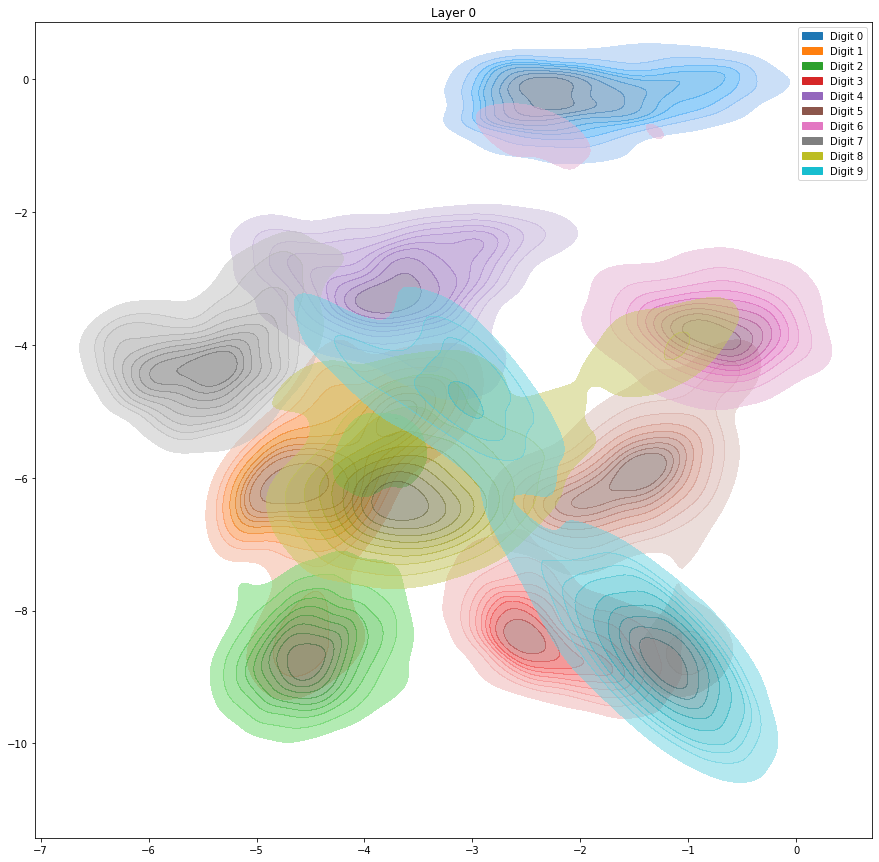

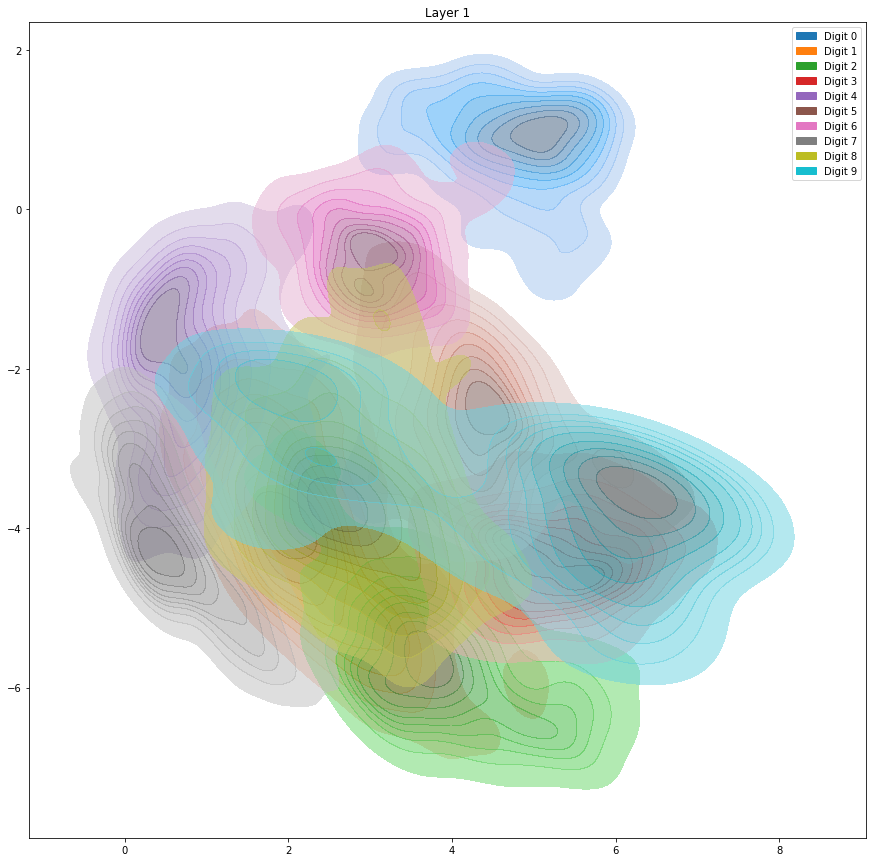

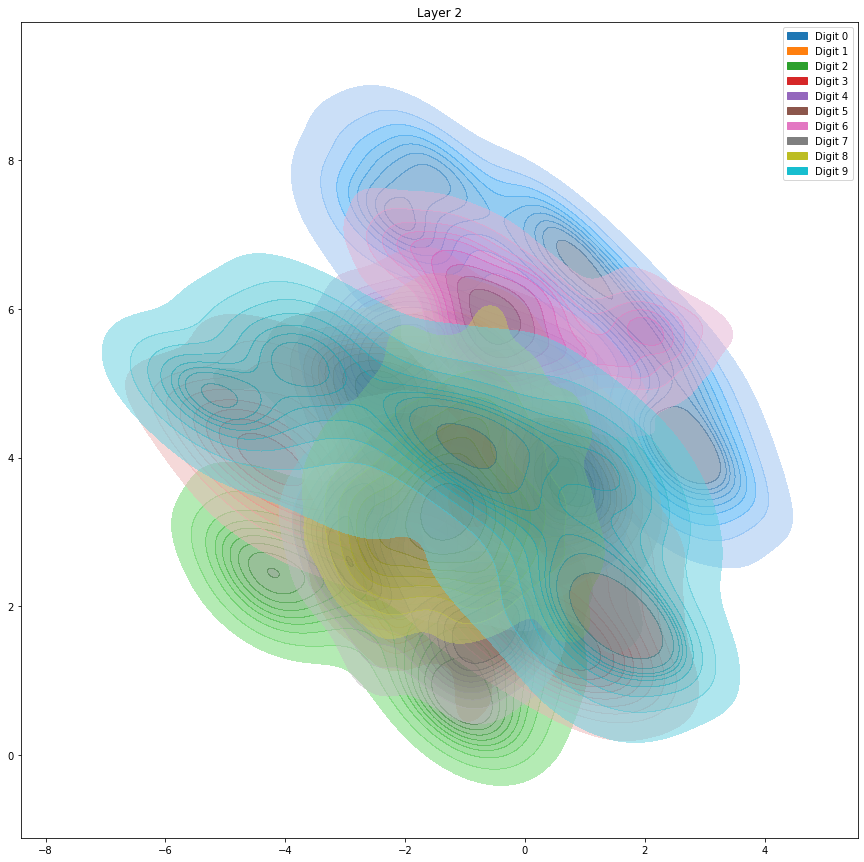

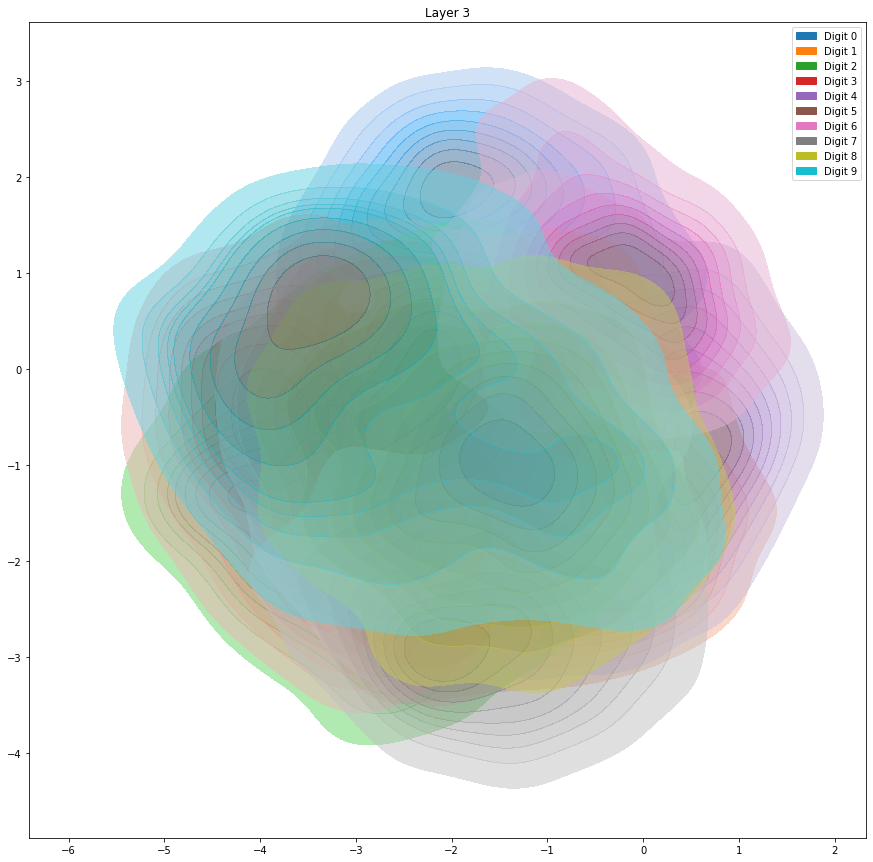

In [78]:
sampled_emb = np.random.choice(
    [sample for sample in range(3000)],
    50
)
for layer in range(4):
    
    visualize_kde_embedding(
        embedding=categorical_traces[f'dense_{layer}'],
        y=y_ts,
        metric='cosine',
        n_epochs=2000,
        random_state=666,
        sampled_emb=sampled_emb,
        title=f'Layer {layer}'
    )